/home/honglab/leijiaxin/anaconda3/envs/MARBLE/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm



---- Embedding dimension: 2
---- Signal dimension: 1
Signal dimension is 1, so manifold computations are disabled!

Embedding dimension <= 2, so manifold computations are disabled!

Embedding dimension /= signal dimension, so manifold computations are disabled!

---- Computing kernels ... 
---- Computing full spectrum ...
              (if this takes too long, then run construct_dataset()
              with number_of_eigenvectors specified) 
---- Settings: 

order : 1
include_self : False
epochs : 100
batch_size : 64
lr : 0.01
momentum : 0.9
dropout : 0.0
batch_norm : batch_norm
hidden_channels : [32]
bias : True
inner_product_features : False
diffusion : True
frac_sampled_nb : -1
include_positions : False
out_channels : 3
vec_norm : False
emb_norm : False
seed : 0
dim_signal : 1
dim_emb : 2
n_sampled_nb : -1

---- Number of features to pass to the MLP:  2
---- Total number of parameters:  260

Using device cuda:0

---- Training network ...

---- Timestamp: 20250227-160622

Epoch: 0, 

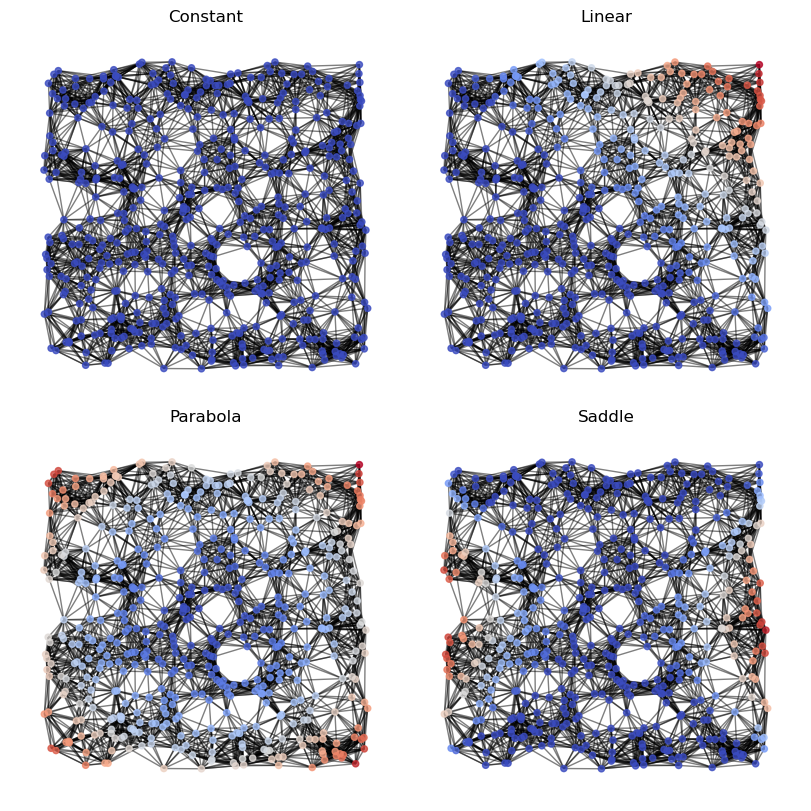

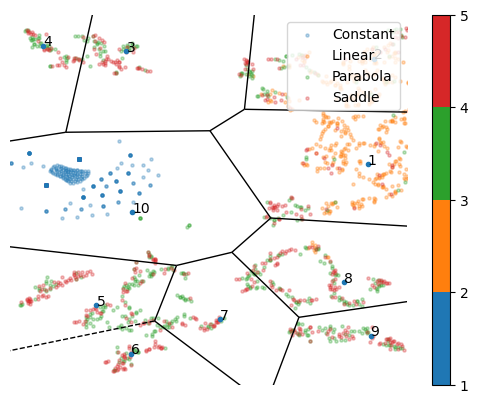

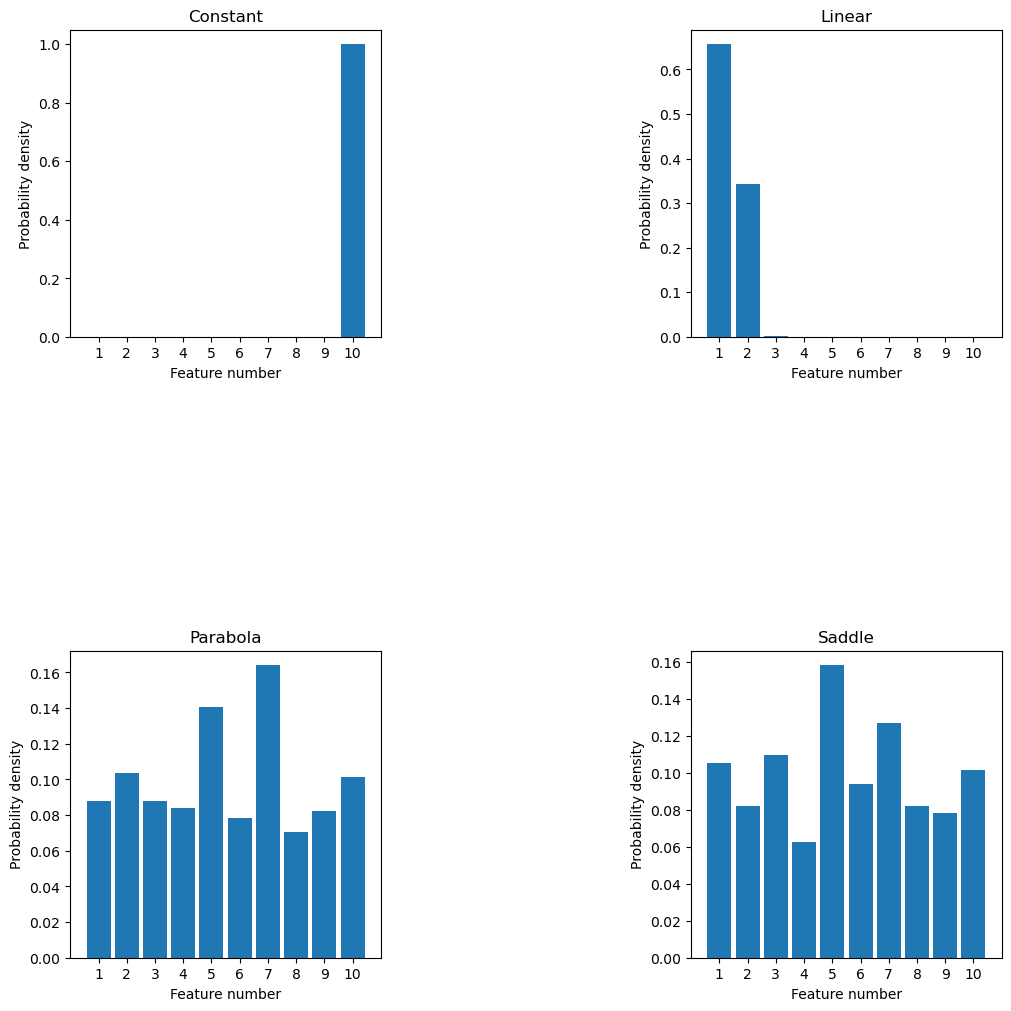

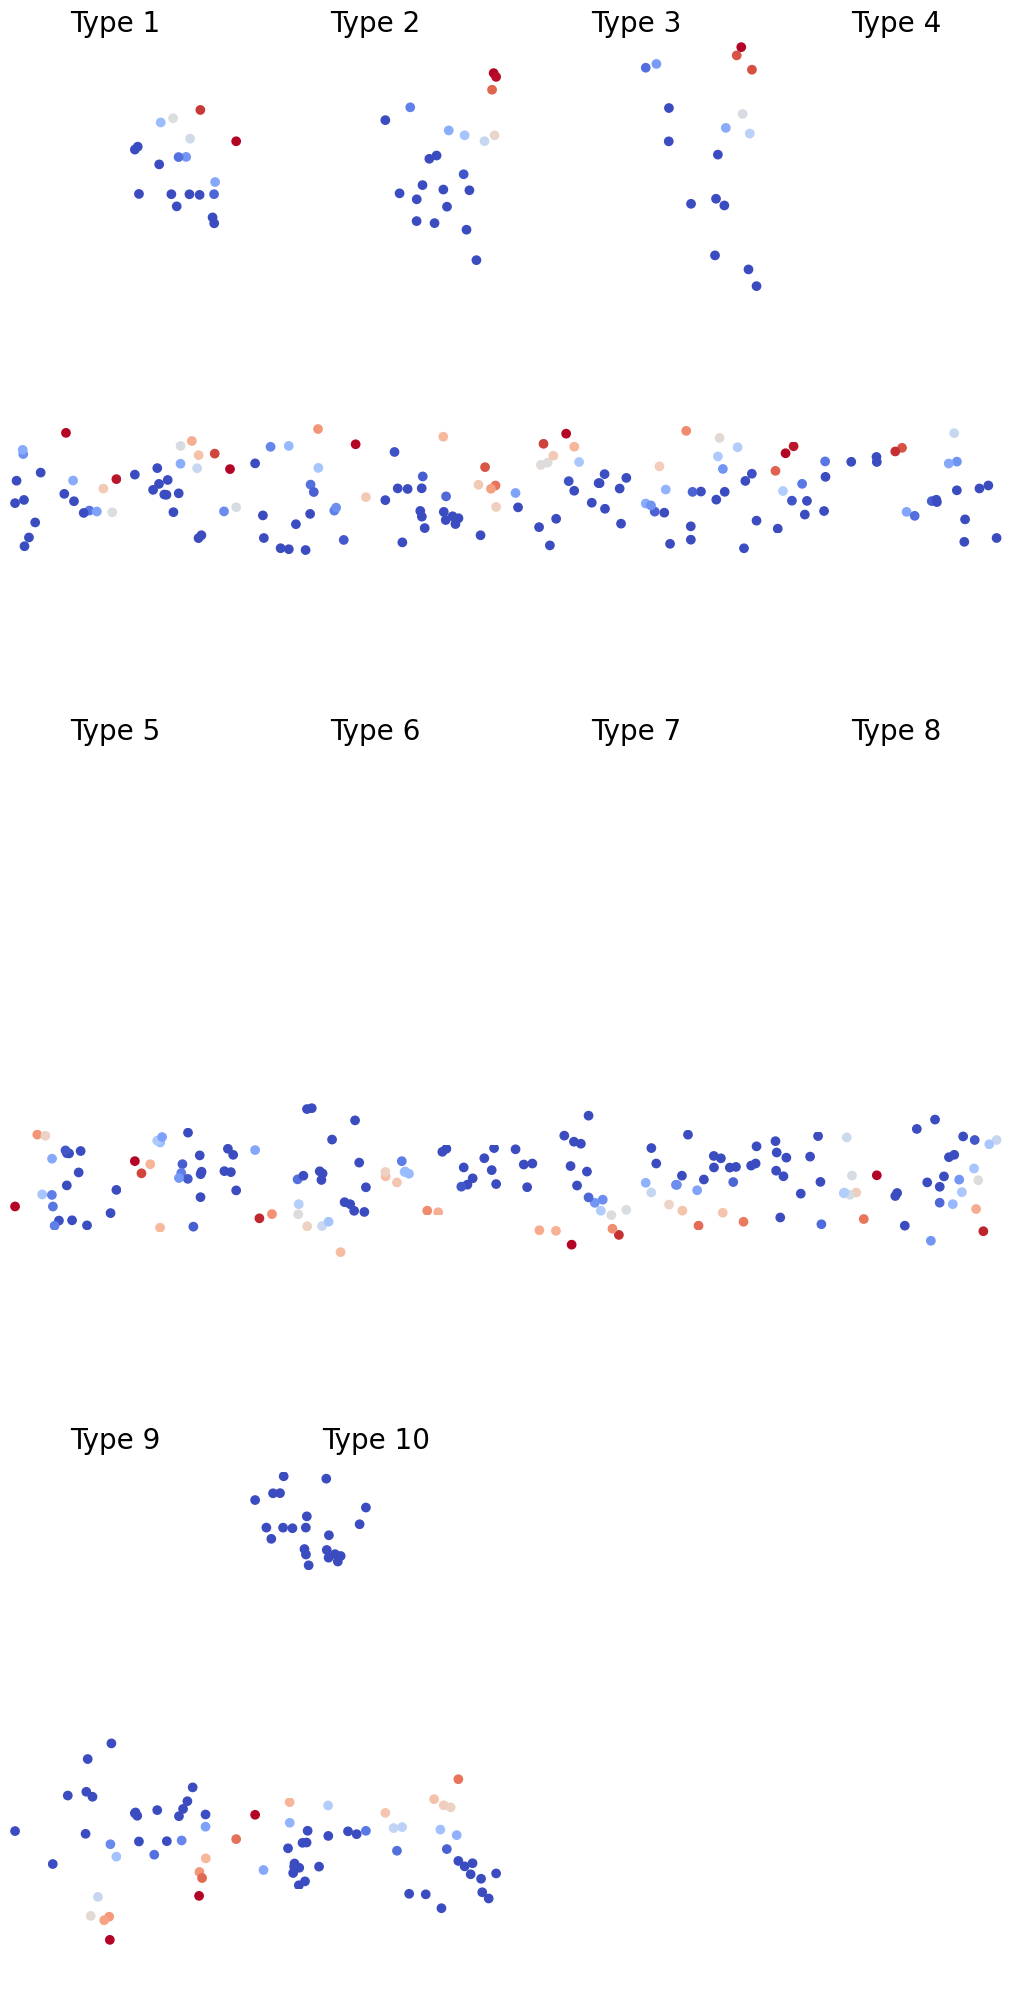

SystemExit: 

/home/honglab/leijiaxin/anaconda3/envs/MARBLE/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3558: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [2]:
"""This example illustrates MARBLE for a scalar field on a flat surface."""
import sys
from MARBLE import plotting, preprocessing, dynamics, net, postprocessing
import matplotlib.pyplot as plt


def f0(x):
    return x[:, [0]] * 0


def f1(x):
    return x[:, [0]] + x[:, [1]]


def f2(x):
    return x[:, [0]] ** 2 + x[:, [1]] ** 2


def f3(x):
    return x[:, [0]] ** 2 - x[:, [1]] ** 2


def main():

    # generate simple vector fields
    # f1: constant, f2: linear, f3: parabola, f4: saddle
    n = 512
    x = [dynamics.sample_2d(n, [[-1, -1], [1, 1]], "random") for i in range(4)]
    y = [f0(x[0]), f1(x[1]), f2(x[2]), f3(x[3])]  # evaluated functions

    # construct data object
    data = preprocessing.construct_dataset(x, y)

    # train model
    params = {
        "order": 1,  # order of derivatives
        "include_self": False,  # remove feature centers, for testing only, to get the figure in the SI
    }

    model = net(data, params=params)
    model.fit(data)

    # evaluate model on data
    data = model.transform(data)
    
    # embed into 2D for visualisation
    data = postprocessing.cluster(data, n_clusters=10)
    data = postprocessing.embed_in_2D(data, embed_typ="tsne")

    # plot
    titles = ["Constant", "Linear", "Parabola", "Saddle"]
    plotting.fields(data, titles=titles, node_size=20, col=2)
    plt.savefig('fields.png')
    plotting.embedding(data, data.y.numpy(), titles=titles, clusters_visible=True)
    plt.savefig('embedding.png')
    plotting.histograms(data, titles=titles)
    plt.savefig('histogram.png')
    plotting.neighbourhoods(data, hops=1, norm=True, figsize=(10, 20))
    plt.savefig('neighbourhoods.png')
    plt.show()


if __name__ == "__main__":
    sys.exit(main())
